In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
from sklearn import preprocessing
import numpy as np
X = mnist.data.astype(float)
X = X/255

y = preprocessing.LabelBinarizer().fit_transform(mnist.target)

train_size = 60000

X_train, X_test = np.split(X, [train_size])
y_train, y_test = np.split(y, [train_size])

Цифра:  9


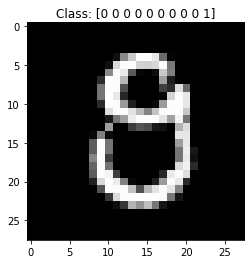

In [3]:
import matplotlib.pyplot as plt

I = 80 # номер изображения для вывода
plt.imshow(X_train[I].reshape([28, 28]), cmap='gray')
plt.title('Class: '+ str(y_train[I]))
print("Цифра: ", np.argmax(y_train[I]))


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(50, input_shape=(784,), activation="relu"))
model.add(Dense(10, activation="softmax"))


In [5]:
model.compile(loss='mse', metrics=['accuracy'], optimizer='Adam')

In [6]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141 - accuracy: 0.9096
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.9503


In [9]:
scores = model.evaluate(X_test, y_test)
print("Ошибка loss:", scores[0], "\nПроцентная точность:", scores[1]*100, "%")

313/313 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9568
Ошибка loss: 0.006741877645254135 
Процентная точность: 95.67999839782715 %


Мнение нейронной сети:  0
Верный ответ:  0


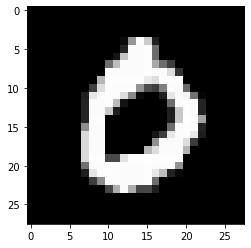

In [8]:
I = 3 # номер изображения для вывода
plt.imshow(X_test[I].reshape([28, 28]), cmap='gray')
print("Мнение нейронной сети: ", np.argmax(model.predict(X_test[I].reshape([1, 784]))))
print("Верный ответ: ", np.argmax(y_test[I]))